In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
I_org = plt.imread(r'panorama.jpg')
I = cv2.cvtColor(I_org,cv2.COLOR_RGB2GRAY) # converting to greyscale so only need to detect corers for one channel 

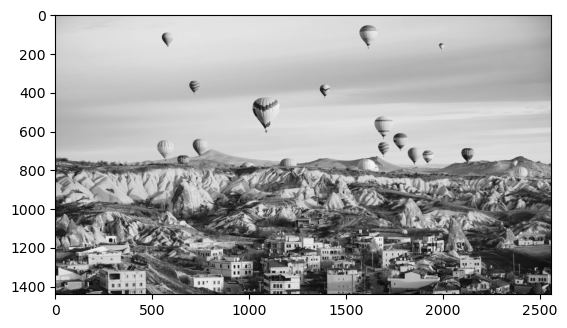

In [3]:
plt.imshow(I,cmap='gray')

# Calculating SSD for each Pixel

In [5]:
numRows , numCols = I.shape[0] , I.shape[1]

In [7]:
directions = {'left':(0,-1),
             'right':(0,1),
             'up':(-1,0),
             'down':(1,0),
             'up_left':(-1,-1),
             'up_right':(-1,1),
             'down_left':(1,-1),
             'down_right':(1,1)}

In [11]:
C = np.zeros(I.shape) # Final matrix that stores min SSD for each pixel
for i in range(2,numRows-2): # looping for all pixels, i,j is pixel of concern (centre pixel). Ignore the outside 2 border pixels so that window always fits on the image
    for j in range(2,numCols-2):
        minSSD = -1
        for d in directions.values(): # exploring all directions
            u , v = d[0] , d[1] # u and v component of direction
            P1 = I[i-1:i+2,j-1:j+2] # patch 1 (3x3) with i,j being centre pixel
            P2 = I[i+u-1:i+u+2,j+v-1:j+v+2] # shifted patch (patch 2) in u and v direction
            ssd = np.sum((P1-P2)**2) 
            if minSSD == -1:
                minSSD = ssd
            elif ssd < minSSD:
                minSSD = ssd
        C[i,j] = minSSD # assigning minSSD value to the pixel

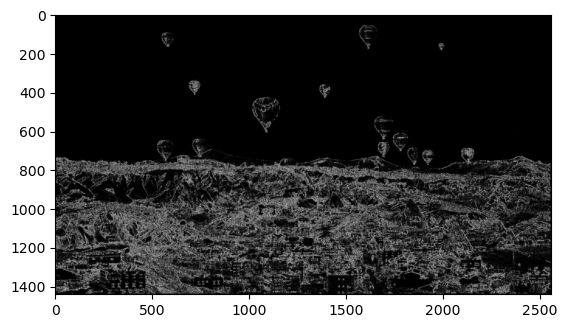

In [12]:
plt.imshow(C,cmap='gray')

# Determining the SSD threshold 

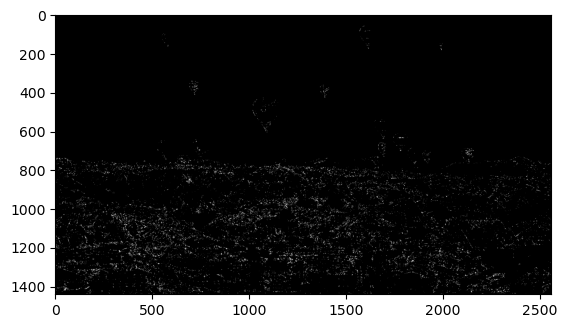

In [17]:
# calculating the average SSD value + 3 standard deviations
th = C.mean()+3*C.std()
C_image = C>th
plt.imshow(C_image,cmap='gray')

# changing colour of corner pixels and plotting on original image

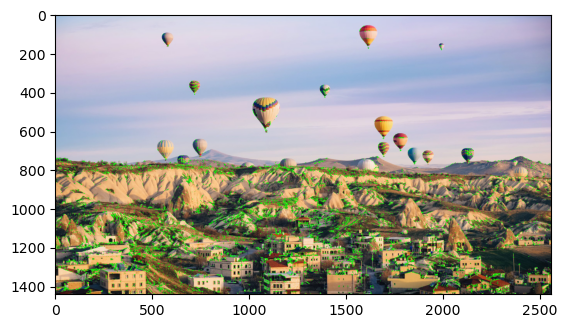

In [28]:
I2 = I_org[:,:,::-1]
idx = np.argwhere(C_image)
r,c = idx[:,0],idx[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2),(c[i],r[i]),radius=1,color=(0,255,0),thickness=-1) # replacing with coloured filled circles
plt.imshow(np.array(I2[:,:,::-1],np.uint8))